In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from pprint import pprint
import random
import os

Using TensorFlow backend.


In [3]:
batch_size = 32
num_classes = 10
epochs = 100

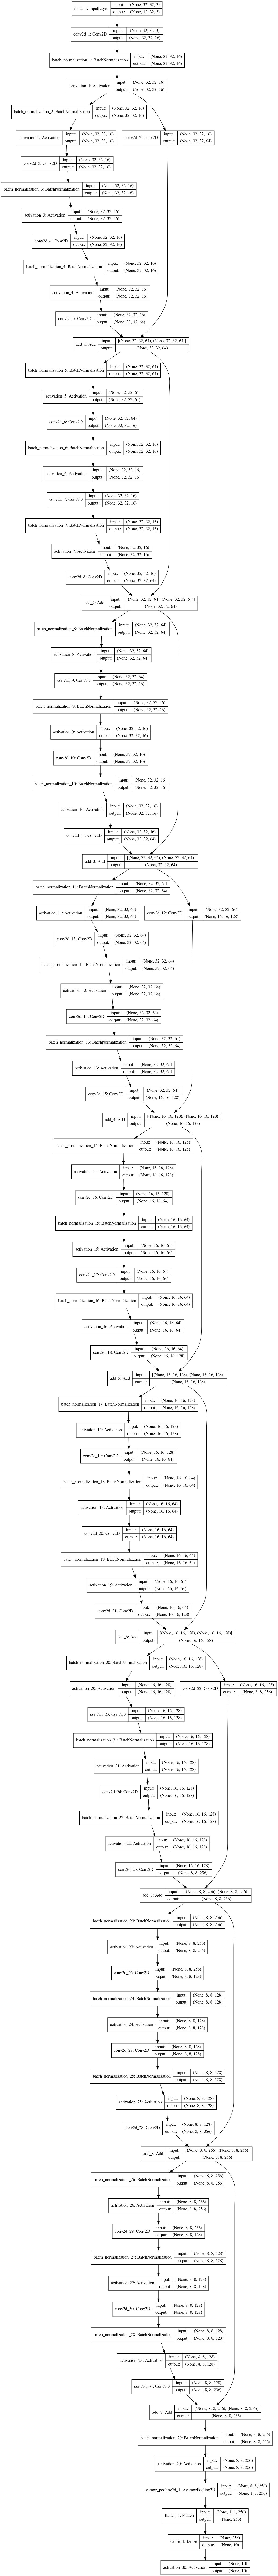

In [4]:
model_dir, model_name = 'saved_models', 'cifar10_resnet_model.040.h5'
model = keras.models.load_model(os.path.join(model_dir, model_name))
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='cifar10_resnet_model.png')

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Input image dimensions.
input_shape = X_train.shape[1:]

# Normalize data.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Subtract pixel mean is enabled
X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [6]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 9s 884us/step
Test loss: 0.37208384939432143
Test accuracy: 0.8902000188827515


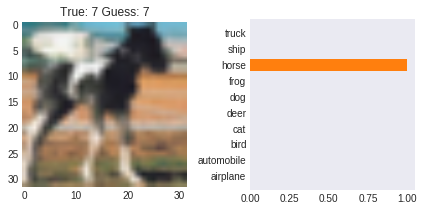

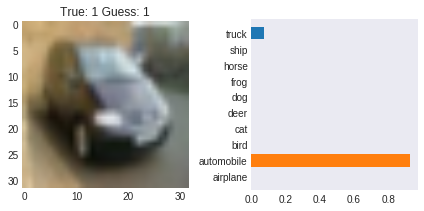

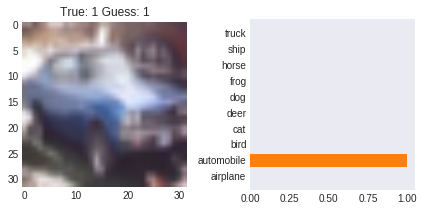

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.style.use('seaborn-dark')

for _ in range(3):
    fig = plt.figure(figsize=(6, 3))
    j = random.choice(range(len(X_test)))
    x = X_test[j]
    y = y_test[j]
    c = model.predict(x[np.newaxis, :])[0]
    x = ((x + X_train_mean) * 255).astype(np.uint32)
    axes = fig.subplots(1, 2)
    axes[0].imshow(x, interpolation='bilinear')
    axes[0].set_title("True: {} Guess: {}".format(np.argmax(y), np.argmax(c)))
    axes[1].barh(classes, c)
    axes[1].barh(classes[np.argmax(c)], c[np.argmax(c)])
    fig.tight_layout()

In [12]:
for j, layer in enumerate(model.layers):
    print(j, layer.name)
    weights = layer.get_weights()
    if weights:
        print(' ', weights[0].shape)
    print('')

0 input_1

1 conv2d_1
  (3, 3, 3, 16)

2 batch_normalization_1
  (16,)

3 activation_1

4 batch_normalization_2
  (16,)

5 activation_2

6 conv2d_3
  (1, 1, 16, 16)

7 batch_normalization_3
  (16,)

8 activation_3

9 conv2d_4
  (3, 3, 16, 16)

10 batch_normalization_4
  (16,)

11 activation_4

12 conv2d_5
  (1, 1, 16, 64)

13 conv2d_2
  (1, 1, 16, 64)

14 add_1

15 batch_normalization_5
  (64,)

16 activation_5

17 conv2d_6
  (1, 1, 64, 16)

18 batch_normalization_6
  (16,)

19 activation_6

20 conv2d_7
  (3, 3, 16, 16)

21 batch_normalization_7
  (16,)

22 activation_7

23 conv2d_8
  (1, 1, 16, 64)

24 add_2

25 batch_normalization_8
  (64,)

26 activation_8

27 conv2d_9
  (1, 1, 64, 16)

28 batch_normalization_9
  (16,)

29 activation_9

30 conv2d_10
  (3, 3, 16, 16)

31 batch_normalization_10
  (16,)

32 activation_10

33 conv2d_11
  (1, 1, 16, 64)

34 add_3

35 batch_normalization_11
  (64,)

36 activation_11

37 conv2d_13
  (1, 1, 64, 64)

38 batch_normalization_12
  (64,)

39 act